In [20]:
#imports
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
folder_outputs = 'output_test_SAFE_implementation'

In [4]:
print(len(os.listdir(folder_outputs)))

132


In [5]:
res_syscall = {}
res_instr = {}
for file in os.listdir(folder_outputs):
    fi = file.split(".")[0].split("_")[-1]
    #find the complete name
    
    with open(folder_outputs + '/' + file, 'r') as f:
        content = f.read()
    l = content.split("End - State of simulation manager :")
    if len(l) == 1:
        print(file)
    if len(l) > 1:
        # n = l[0].split("Building SCDG of unknown/")[1].split(".")[0]
        if fi not in res_syscall:
            res_syscall[fi] = {}
            res_instr[fi] = {}
        i = l[1].split("Number of instr visited: ")[1].split("\n")[0]
        l = l[1].split("Syscalls Found:")[1]
        l = l.split("\n")[0]
        l = l.replace("\'", "\"")
        data = json.loads(l)
        s = sum(data.values())
        if "no_SAFE" in file:
            res_syscall[fi]["no_SAFE"] = s
            res_instr[fi]["no_SAFE"] = int(i)
        else:
            res_syscall[fi]["SAFE"] = s
            res_instr[fi]["SAFE"] = int(i)
to_pop = []
for k in res_syscall:
    if len(res_syscall[k].keys()) !=2:
        print(k)
        print(res_syscall[k])
        print()
        to_pop.append(k)
print (len(to_pop))
for k in to_pop:
    res_syscall.pop(k)
    res_instr.pop(k)
print (res_syscall)
print(res_instr)

output_warzone_SAFE_d13213.txt
output_warzone_SAFE_0f3d2d.txt
output_warzone_SAFE_d1b001.txt
output_warzone_no_SAFE_d1b001.txt
d13213
{'no_SAFE': 2221}

0f3d2d
{'no_SAFE': 2221}

2
{'8bbf01': {'SAFE': 1727, 'no_SAFE': 1727}, '68191d': {'SAFE': 3645, 'no_SAFE': 3654}, 'a9602c': {'SAFE': 1823, 'no_SAFE': 1740}, '64421a': {'SAFE': 1715, 'no_SAFE': 1715}, '115deb': {'no_SAFE': 3921, 'SAFE': 3921}, '089f2a': {'no_SAFE': 4460, 'SAFE': 4425}, '288aaf': {'no_SAFE': 1608, 'SAFE': 1599}, '0fb4fd': {'SAFE': 3717, 'no_SAFE': 3752}, '0bb084': {'no_SAFE': 3570, 'SAFE': 3606}, 'd56567': {'no_SAFE': 4311, 'SAFE': 4260}, '3eaf9b': {'SAFE': 5132, 'no_SAFE': 5132}, 'd9db59': {'no_SAFE': 4310, 'SAFE': 4617}, '0fdb0b': {'SAFE': 4281, 'no_SAFE': 4281}, '2fb557': {'SAFE': 1643, 'no_SAFE': 1644}, 'a6c102': {'SAFE': 4281, 'no_SAFE': 4281}, '3da2da': {'SAFE': 5999, 'no_SAFE': 5304}, 'e6c579': {'no_SAFE': 3706, 'SAFE': 3729}, '86eaa1': {'no_SAFE': 1608, 'SAFE': 1599}, '906125': {'no_SAFE': 4574, 'SAFE': 4574}, '

3802.4761904761904
3737.4603174603176


<Axes: xlabel='file'>

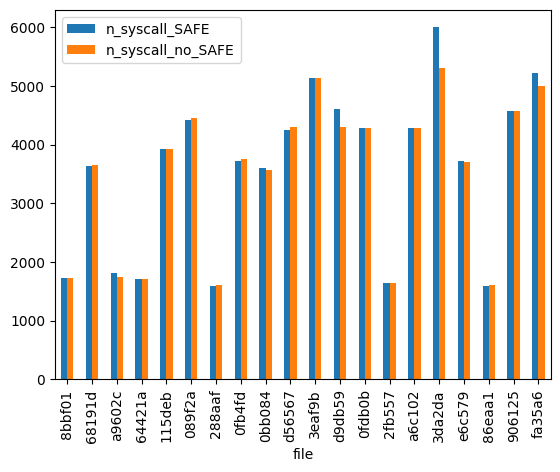

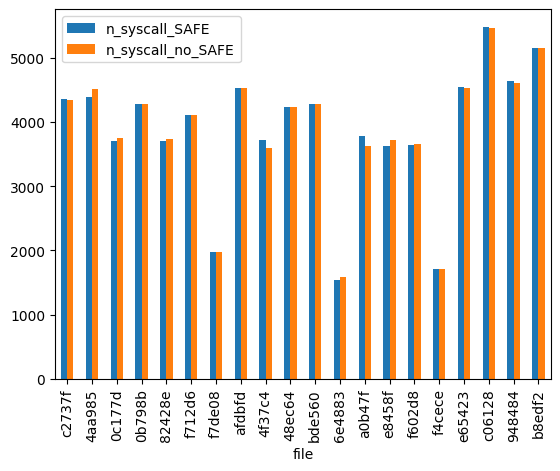

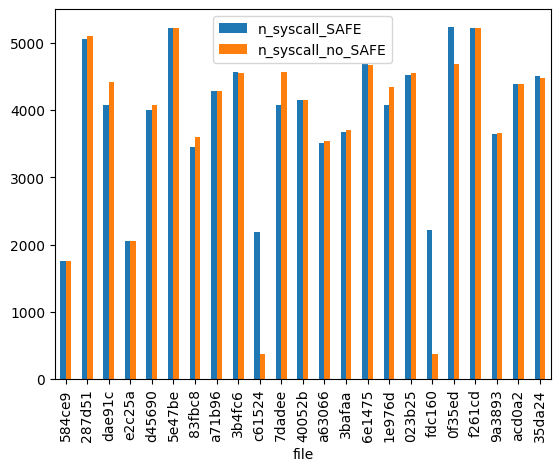

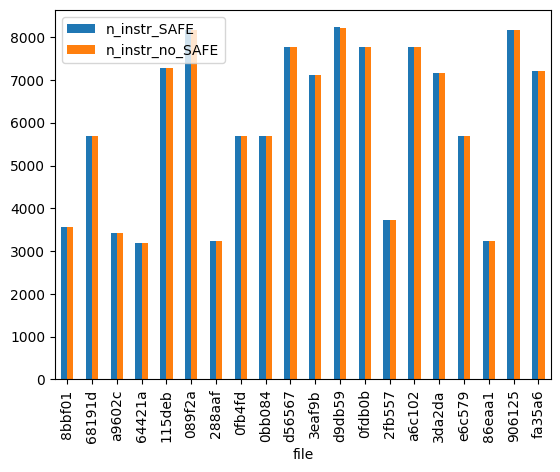

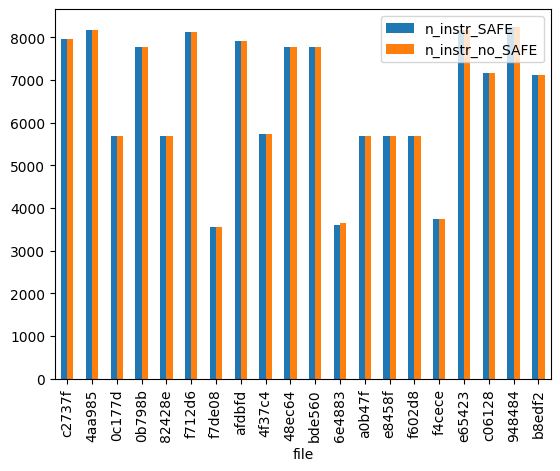

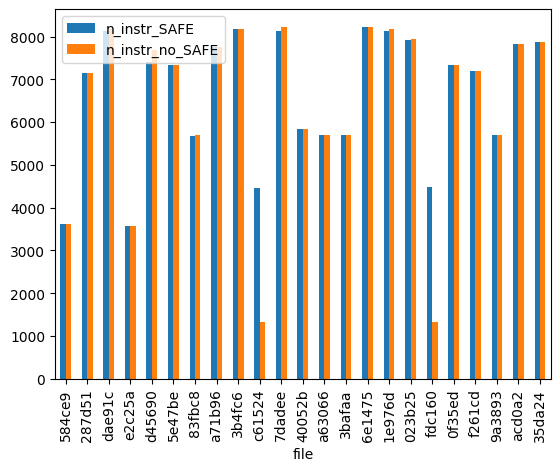

In [17]:
#plot histogram of syscalls
x = list(res_syscall.keys())
#pick randomly 20 files
#x = random.sample(x, 20)
y_SAFE = [res_syscall[k]["SAFE"] for k in x]
y_no_SAFE = [res_syscall[k]["no_SAFE"] for k in x]
instr_SAFE = [res_instr[k]["SAFE"] for k in x]
instr_no_SAFE = [res_instr[k]["no_SAFE"] for k in x]
print(np.mean(y_SAFE))
print(np.mean(y_no_SAFE))
# bar_width = 0.35
# bar_positions1 = np.arange(len(x))
# bar_positions2 = bar_positions1 + bar_width
# plt.bar(bar_positions1, y_SAFE,width=bar_width, color='orange', label='SAFE')
# plt.bar(bar_positions2, y_no_SAFE,width=bar_width, color='b', label='no SAFE')
# plt.legend()
# plt.xlabel('file')
# plt.ylabel('number of syscalls')
# plt.title('Number of syscalls per file with and whithout SAFE')
# plt.show()
df1 = pd.DataFrame({'file': x[0:20], 'n_syscall_SAFE': y_SAFE[0:20], 'n_syscall_no_SAFE': y_no_SAFE[0:20], 'n_instr_SAFE': instr_SAFE[0:20], 'n_instr_no_SAFE': instr_no_SAFE[0:20]})
df1.plot(x='file', y=['n_syscall_SAFE', 'n_syscall_no_SAFE'], kind='bar')

df2 = pd.DataFrame({'file': x[20:40], 'n_syscall_SAFE': y_SAFE[20:40], 'n_syscall_no_SAFE': y_no_SAFE[20:40], 'n_instr_SAFE': instr_SAFE[20:40], 'n_instr_no_SAFE': instr_no_SAFE[20:40]})
df2.plot(x='file', y=['n_syscall_SAFE', 'n_syscall_no_SAFE'], kind='bar')

df3 = pd.DataFrame({'file': x[40:], 'n_syscall_SAFE': y_SAFE[40:], 'n_syscall_no_SAFE': y_no_SAFE[40:], 'n_instr_SAFE': instr_SAFE[40:], 'n_instr_no_SAFE': instr_no_SAFE[40:]})
# print(x[40:])
# print(y_SAFE[40:])
# print(y_no_SAFE[40:])
df3.plot(x='file', y=['n_syscall_SAFE', 'n_syscall_no_SAFE'], kind='bar')

df1.plot(x='file', y=['n_instr_SAFE', 'n_instr_no_SAFE'], kind='bar')
df2.plot(x='file', y=['n_instr_SAFE', 'n_instr_no_SAFE'], kind='bar')
df3.plot(x='file', y=['n_instr_SAFE', 'n_instr_no_SAFE'], kind='bar')

3802.4761904761904
3737.4603174603176


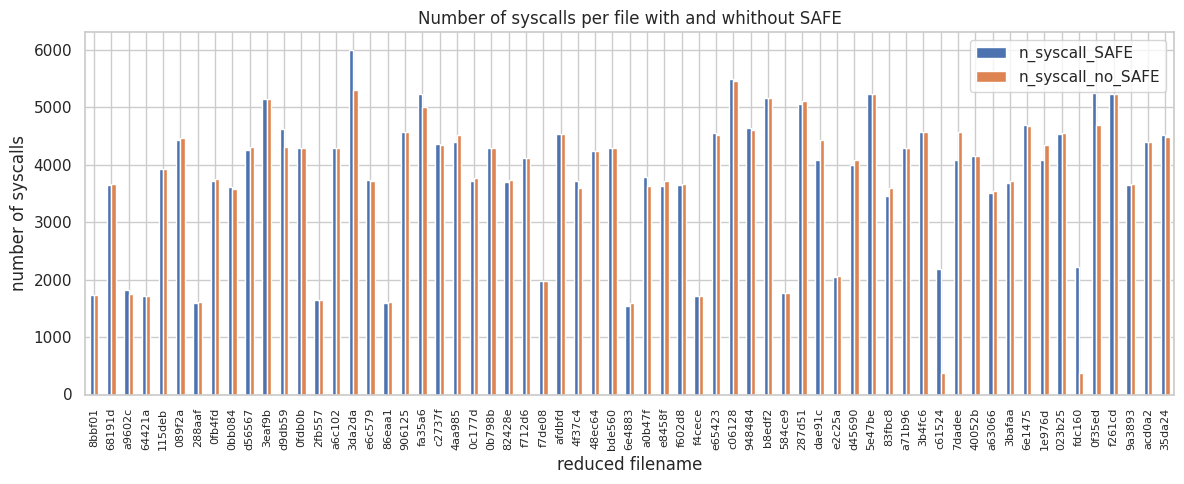

In [22]:
#plot histogram of syscalls

x = list(res_syscall.keys())
y_SAFE = [res_syscall[k]["SAFE"] for k in x]
y_no_SAFE = [res_syscall[k]["no_SAFE"] for k in x]
print(np.mean(y_SAFE))
print(np.mean(y_no_SAFE))
df1 = pd.DataFrame({'file': x, 'n_syscall_SAFE': y_SAFE, 'n_syscall_no_SAFE': y_no_SAFE})
df1.plot(x='file', y=['n_syscall_SAFE', 'n_syscall_no_SAFE'], kind='bar',figsize=(12, 5))

plt.title("Number of syscalls per file with and whithout SAFE")
plt.xlabel("reduced filename")
plt.ylabel("number of syscalls")
plt.xticks(fontsize=8, rotation=90)


plt.tight_layout()
plt.show()

3802.4761904761904
3737.4603174603176


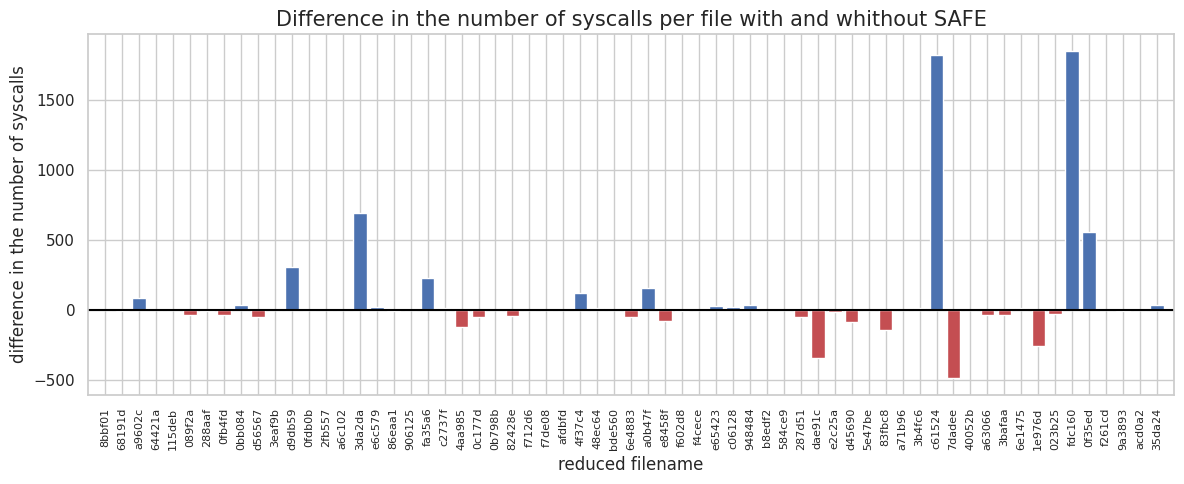

In [37]:
#plot histogram of syscalls



x = list(res_syscall.keys())
y_SAFE = [res_syscall[k]["SAFE"] for k in x]
y_no_SAFE = [res_syscall[k]["no_SAFE"] for k in x]
max_val = [max(y_SAFE[i], y_no_SAFE[i]) for i in range(len(y_SAFE))]
dif = [y_SAFE[i] - y_no_SAFE[i] for i in range(len(y_SAFE))]
dif_pos = [dif[i] if dif[i] > 0 else 0 for i in range(len(dif)) ]
dif_neg = [dif[i] if dif[i] < 0 else 0 for i in range(len(dif))]
print(np.mean(y_SAFE))
print(np.mean(y_no_SAFE))
df1 = pd.DataFrame({'file': x, 'positive difference in the number of syscalls': dif_pos, 'negative difference in the number of syscalls': dif_neg})
#df1.plot(x='file', y=['positive difference in the number of syscalls', 'negative difference in the number of syscalls'], kind='bar',figsize=(12, 5), color=['b', 'r'], width=0.8)
plt.figure(figsize=(12, 5))
plt.bar(x, dif_pos, color='b')
plt.bar(x, dif_neg, color='r')



#line at 0
plt.axhline(y=0, color='black')
plt.title("Difference in the number of syscalls per file with and whithout SAFE",fontsize=15)
plt.xlabel("reduced filename")
plt.ylabel("difference in the number of syscalls")
plt.xticks(fontsize=8, rotation=90)
plt.xlim(-1, len(x))


plt.tight_layout()
#plt.show()
plt.savefig('difference_syscalls.svg', format='svg')

3802.4761904761904
3737.4603174603176


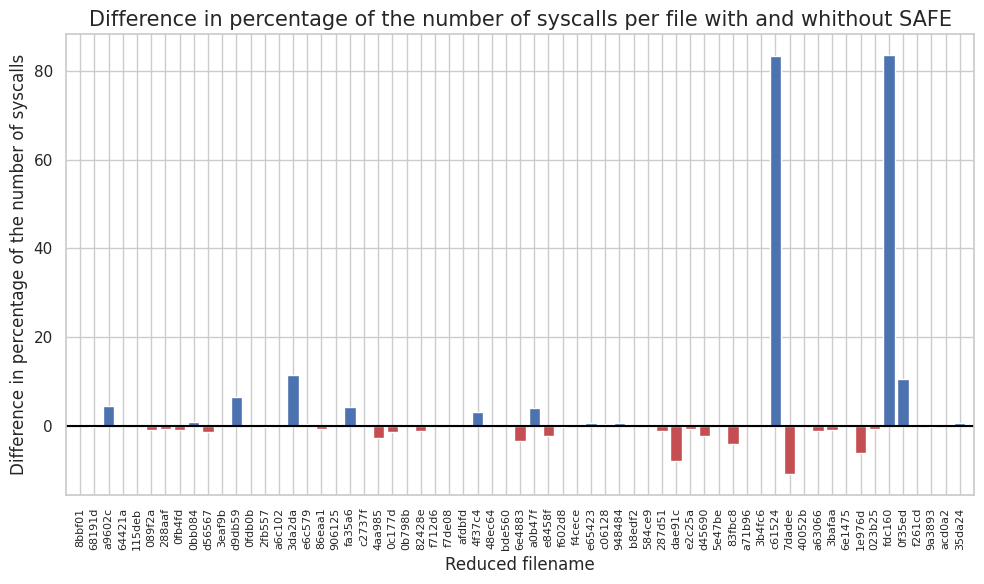

In [46]:
#plot histogram of syscalls



x = list(res_syscall.keys())
y_SAFE = [res_syscall[k]["SAFE"] for k in x]
y_no_SAFE = [res_syscall[k]["no_SAFE"] for k in x]
max_val = [max(y_SAFE[i], y_no_SAFE[i]) for i in range(len(y_SAFE))]
dif = [y_SAFE[i] - y_no_SAFE[i] for i in range(len(y_SAFE))]
dif_pos = [100*dif[i]/max_val[i] if dif[i] > 0 else 0 for i in range(len(dif)) ]
dif_neg = [100*dif[i]/max_val[i] if dif[i] < 0 else 0 for i in range(len(dif))]
print(np.mean(y_SAFE))
print(np.mean(y_no_SAFE))
df1 = pd.DataFrame({'file': x, 'positive difference in the number of syscalls': dif_pos, 'negative difference in the number of syscalls': dif_neg})
#df1.plot(x='file', y=['positive difference in the number of syscalls', 'negative difference in the number of syscalls'], kind='bar',figsize=(12, 5), color=['b', 'r'], width=0.8)
plt.figure(figsize=(10, 6), dpi=100)
plt.bar(x, dif_pos, color='b')
plt.bar(x, dif_neg, color='r')



#line at 0
plt.axhline(y=0, color='black')
plt.title("Difference in percentage of the number of syscalls per file with and whithout SAFE",fontsize=15)
plt.xlabel("Reduced filename")
plt.ylabel("Difference in percentage of the number of syscalls")
plt.xticks(fontsize=8, rotation=90)
plt.xlim(-1, len(x))


plt.tight_layout()
#plt.show()
plt.savefig('difference_syscalls.pdf', format='pdf')